In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import chardet, glob
import seaborn as sns
#%matplotlib widget
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 718.6 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install glob2

  Preparing metadata (setup.py) ... done
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9301 sha256=049cae39356f7e9a77ecb71967773960e926f1577d9d2a926d01dd3825382908
  Stored in directory: /Users/rkankaria/Library/Caches/pip/wheels/f7/ba/d7/aace15efcaea623e0e62fa8463e01b76b28aeea347f194acbb
Successfully built glob2

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
df_overview = pd.read_excel('dataset/Overview.xlsx')
df_overview = df_overview.drop(['Unnamed: 13','Note'], axis=1)
df_overview = df_overview.dropna()
df_overview.rename(columns = {'Unnamed: 8':'SoC difference'}, inplace = True)
df_overview.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),SoC difference,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,"Automatic, Level 1"
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,"Automatic, Level 1"
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,"Automatic, Level 1"
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,"Automatic, Level 1"
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,"Automatic, Level 1"


In [8]:
def combine_csvs():
    ''' Combine all csv datasets into a single file'''
    df_master = pd.DataFrame()
    for filename in glob.glob('/kaggle/input/battery-and-heating-data-in-real-driving-cycles/'+'*.csv'):
        df_trip = pd.read_csv(
            filename,
            sep=';',
            encoding=chardet.detect(open(filename, 'rb').read())['encoding']
        )
        df_master = pd.concat([df_master, df_trip])
        df_master.to_csv('/kaggle/input/alltrips1csv/AllTrips1.csv', index=False)
    return df_master


def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables"""
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    for idx, key in enumerate(measurements):
        plt.subplot(nrows, ncols, idx+1)
        plt.plot(np.array(range(df.shape[0]))*0.1, df[key])
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(measurements[0])
        plt.show

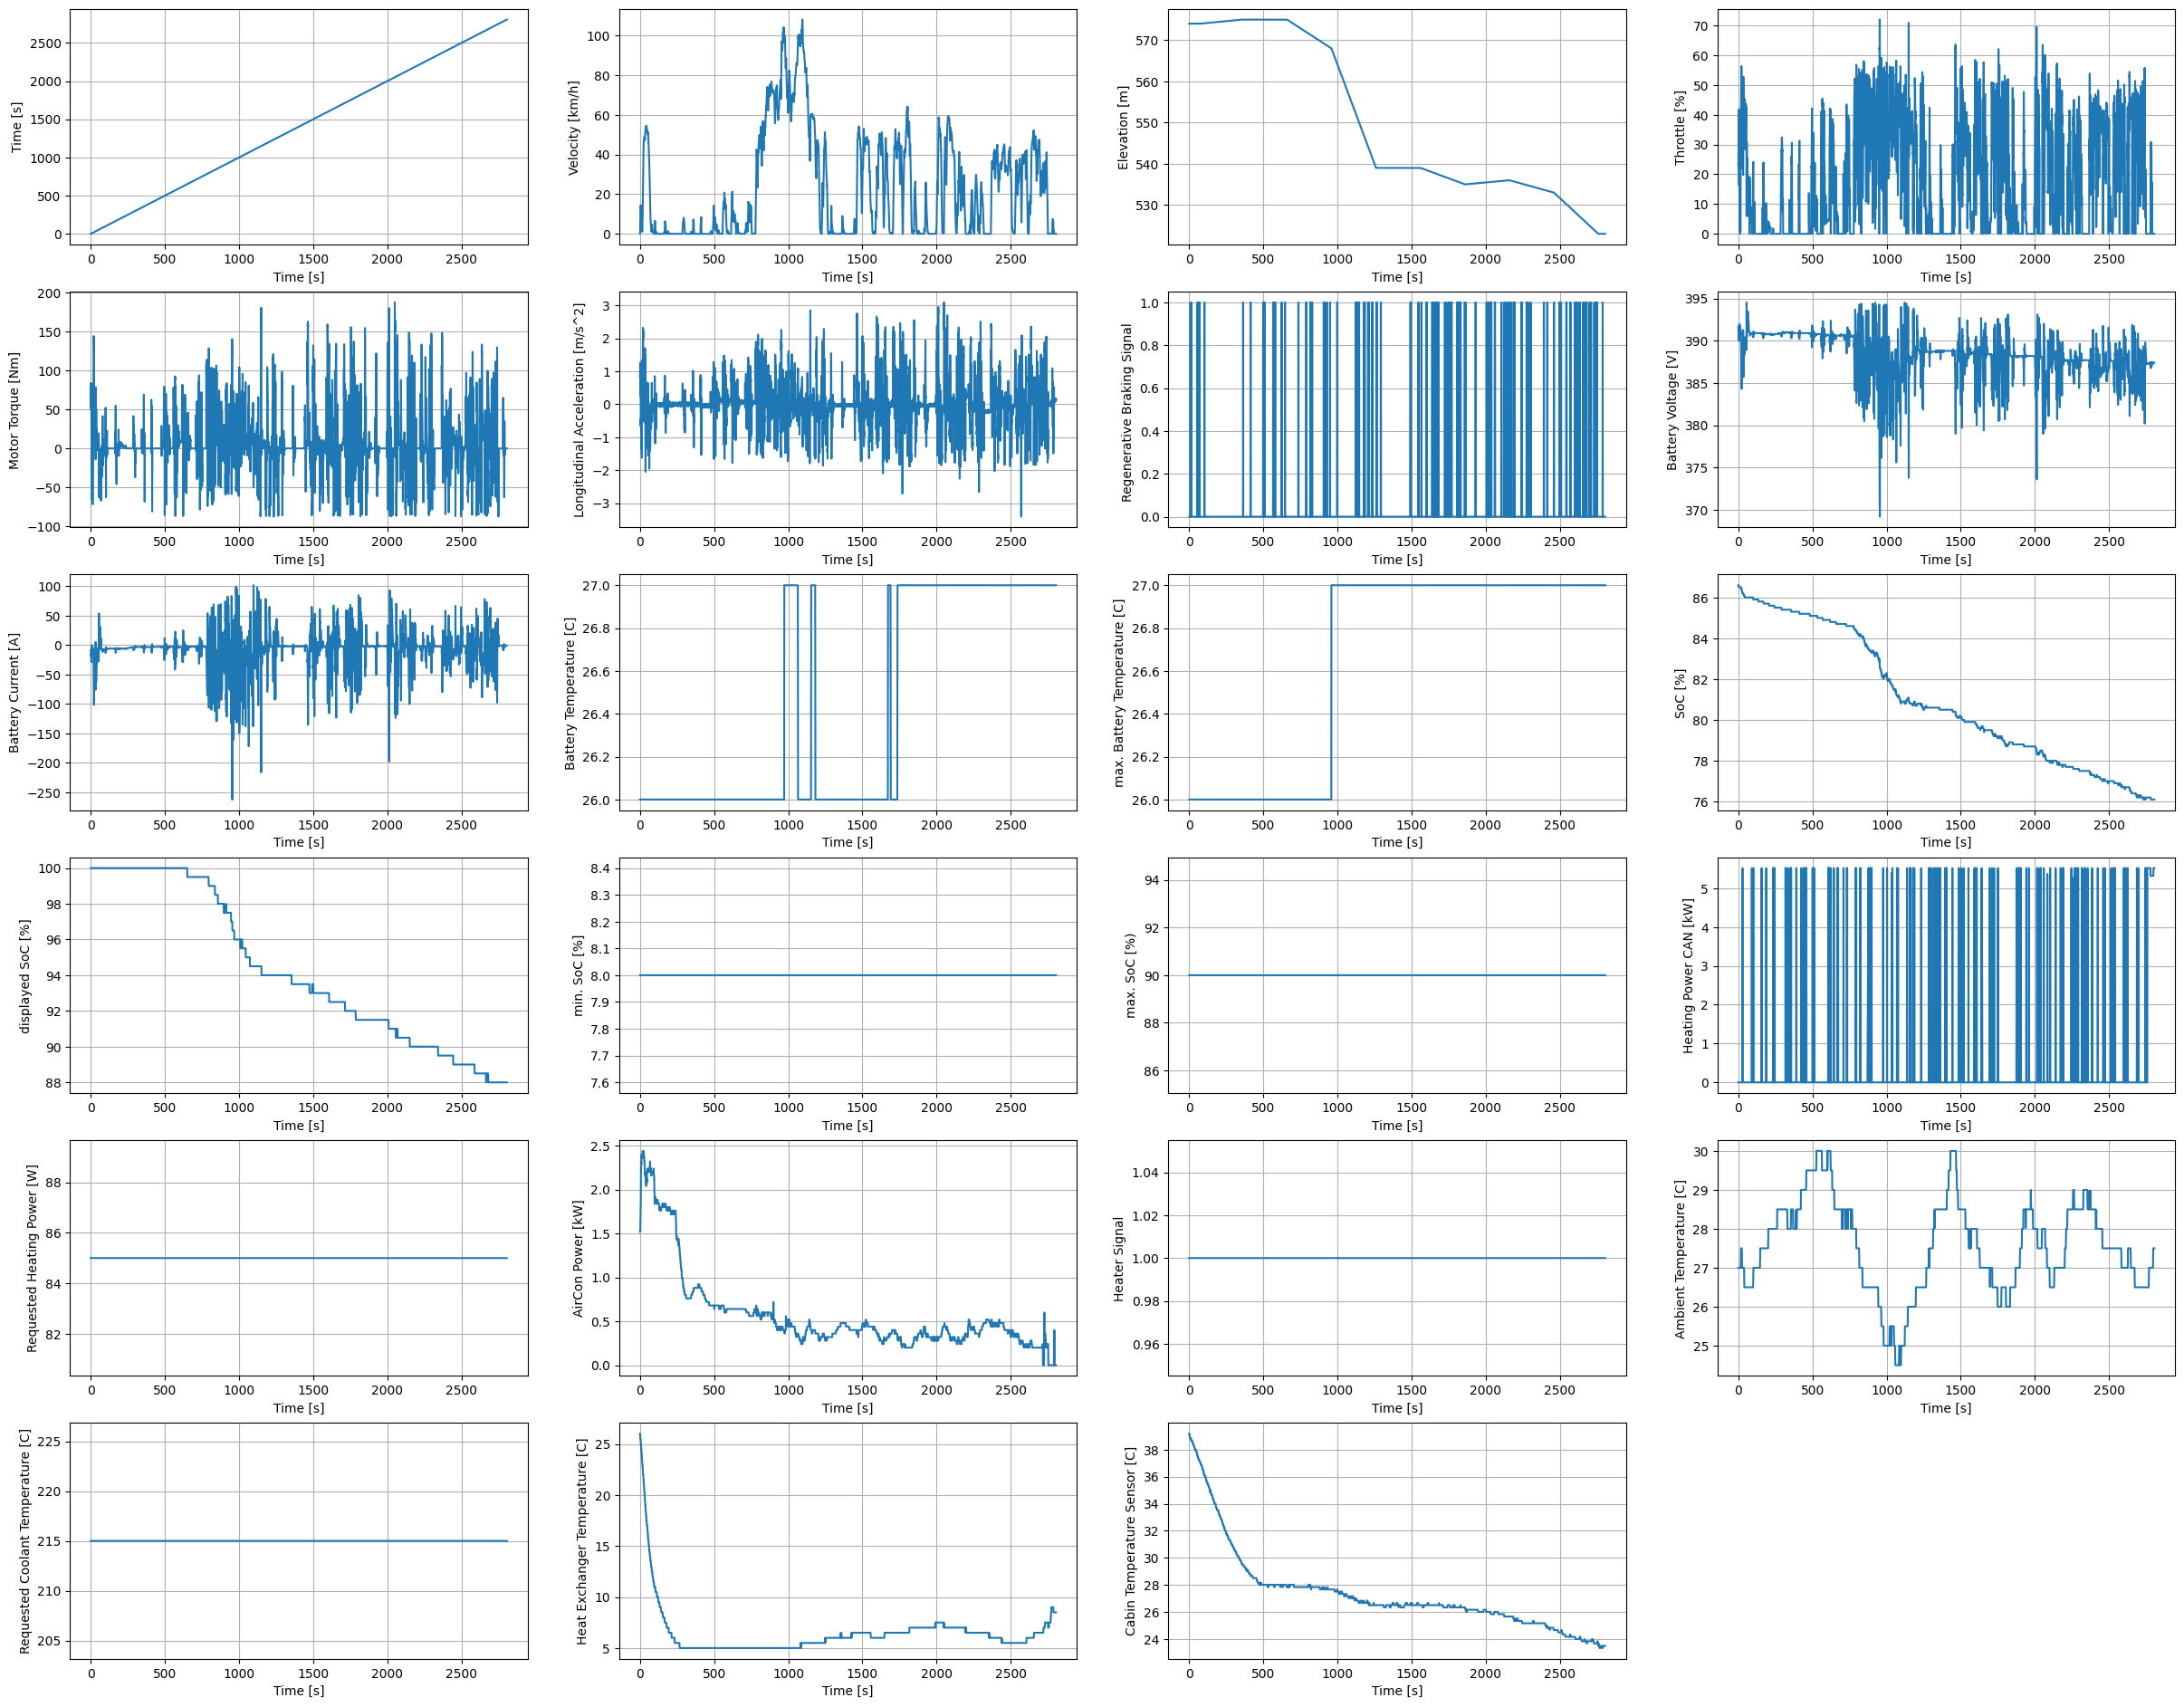

In [9]:
#Single trip
df_trip = pd.read_csv(
    'dataset/TripA08.csv',
    sep=';',
    encoding=chardet.detect(open(f'dataset/TripA08.csv', 'rb').read())['encoding']
)
# Plot results of a single trips
plot_dataframe_subplots(df_trip, nrows=12, ncols=4, figsize=(30, 48))

In [42]:
# Load in the dataset
if os.path.exists('dataset/all_trips_reduced.csv'):
    df_master = pd.read_csv('dataset/all_trips_reduced.csv')
#else: df_master = combine_csvs()

# Remove last 2 columns since they are Nan
columns = ['trip_id']
df_master.drop(columns=columns, inplace=True)
print(list(df_master.columns.values))

['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Battery Voltage [V]', 'Battery Current [A]', 'SoC [%]', 'displayed SoC [%]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Ambient Temperature [C]', 'Battery Temperature [C]']


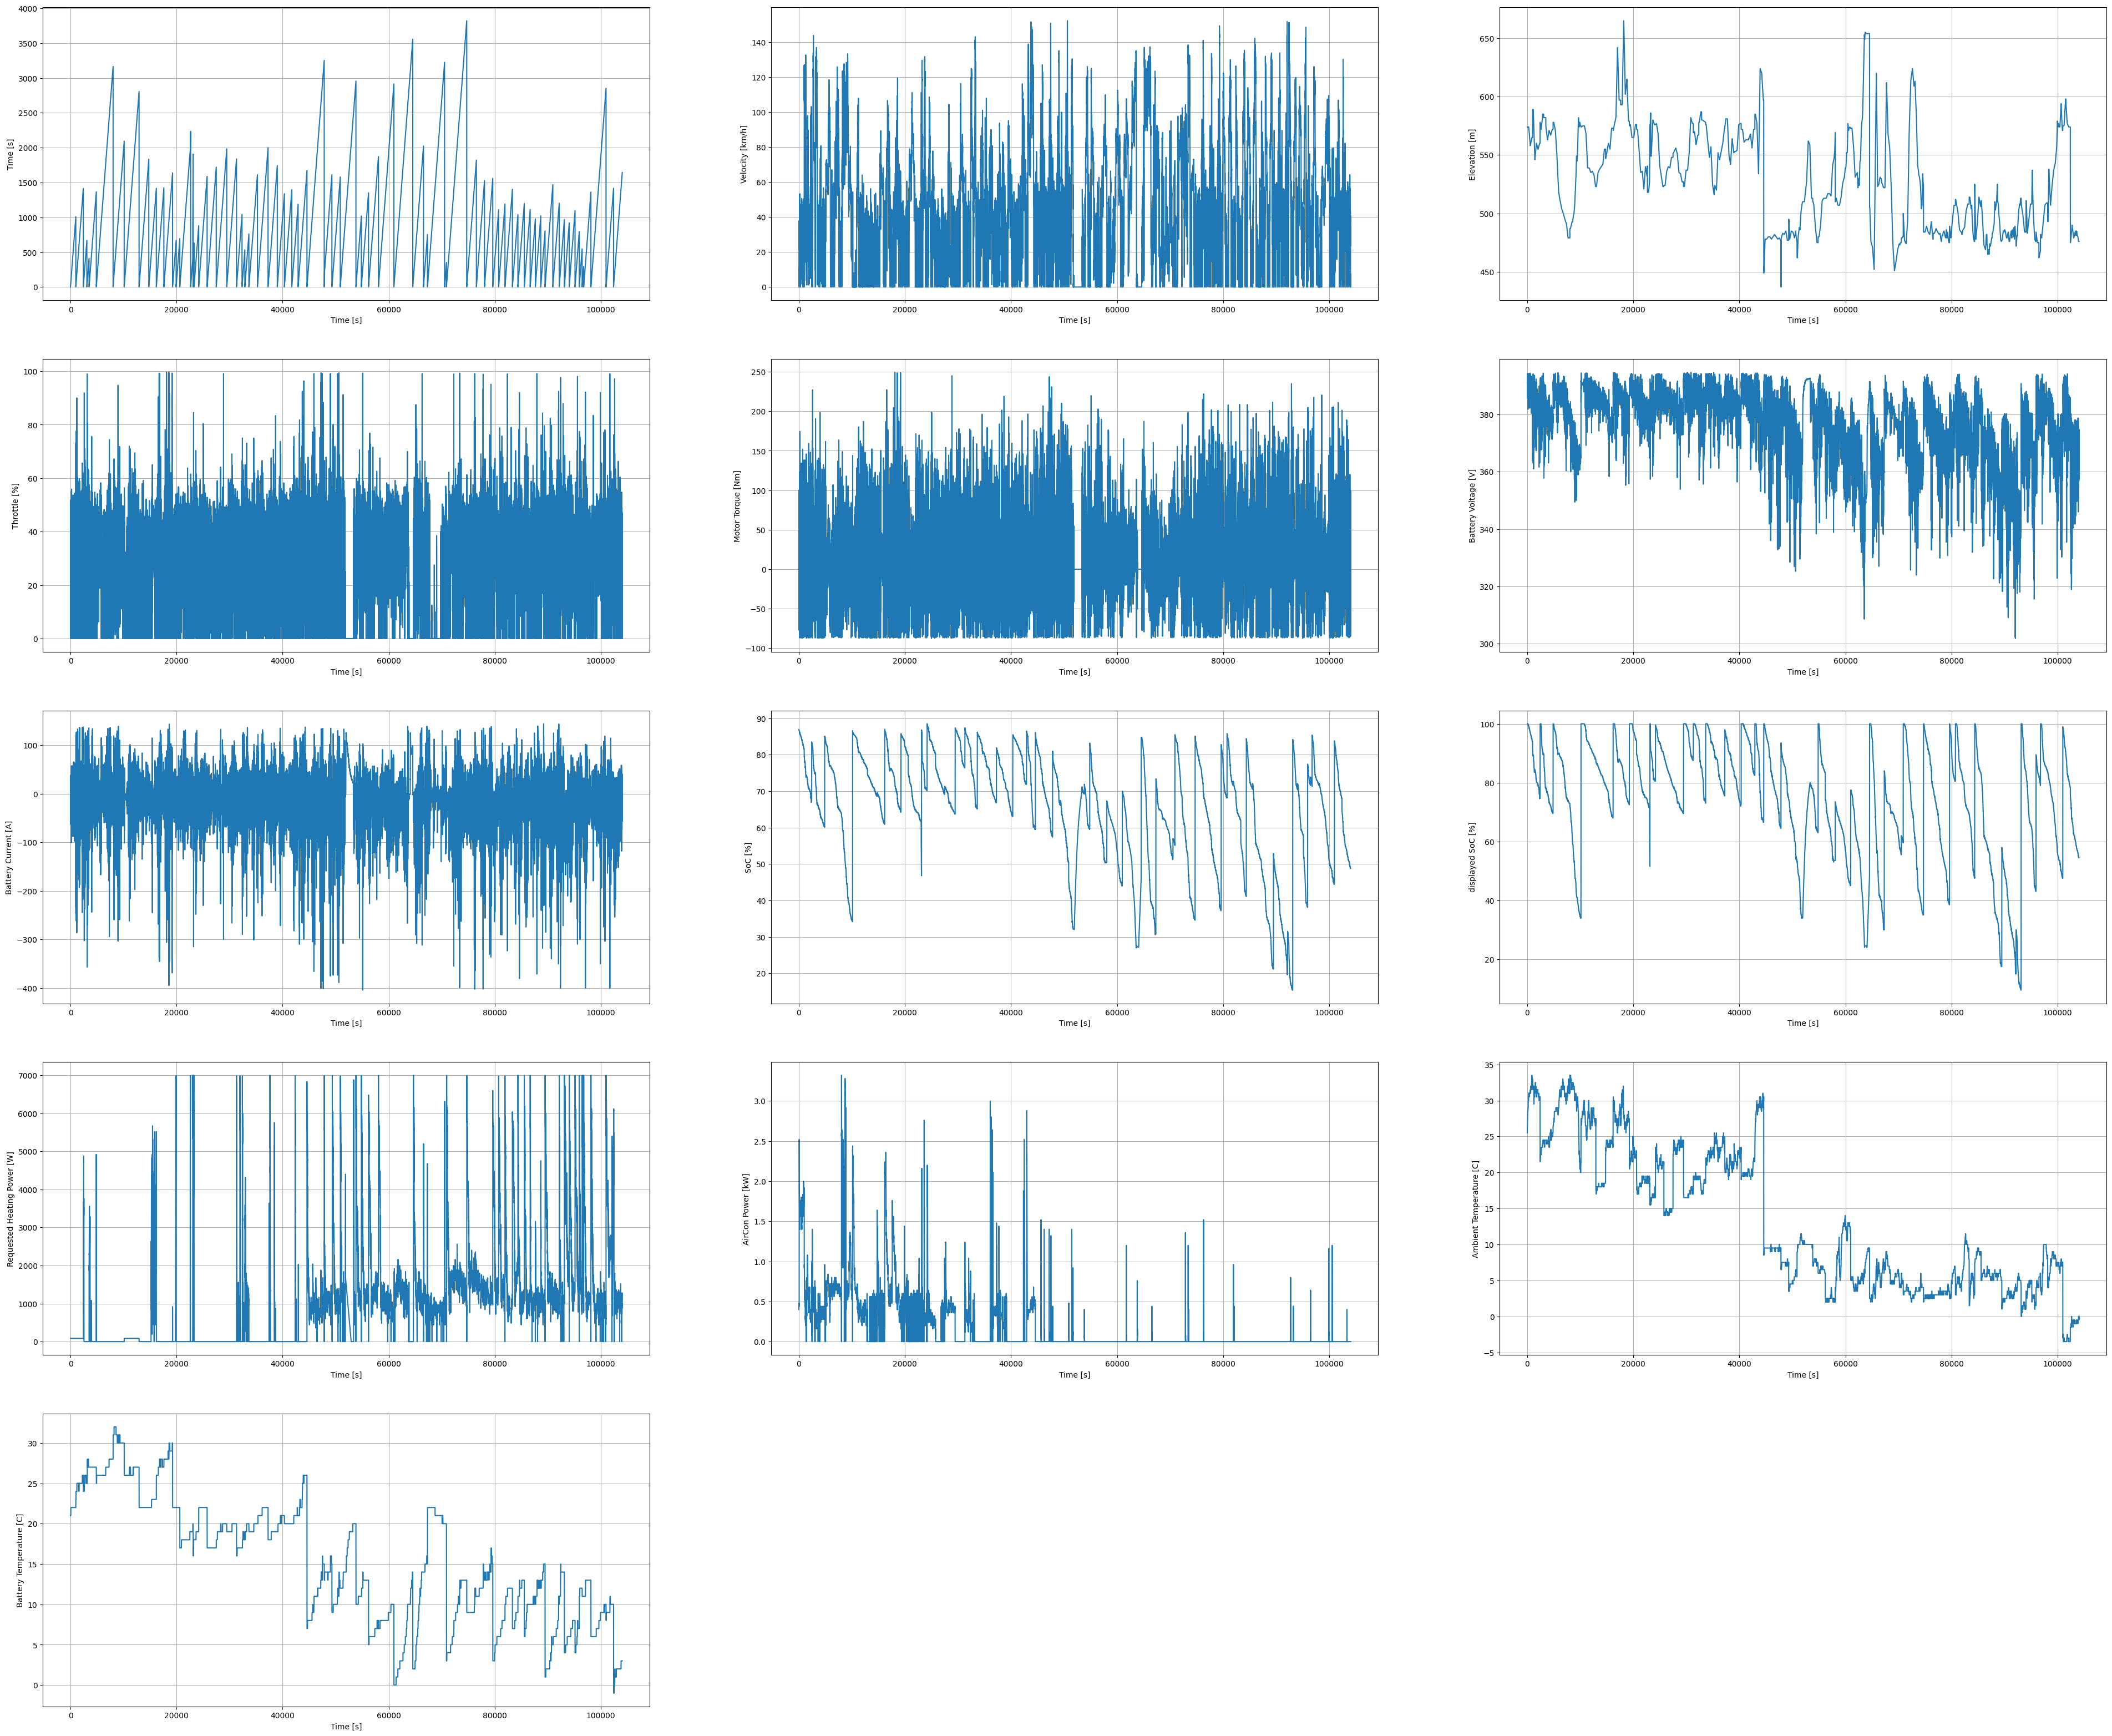

In [44]:
plot_dataframe_subplots(df_master, nrows=6, ncols=3, figsize=(48,48))

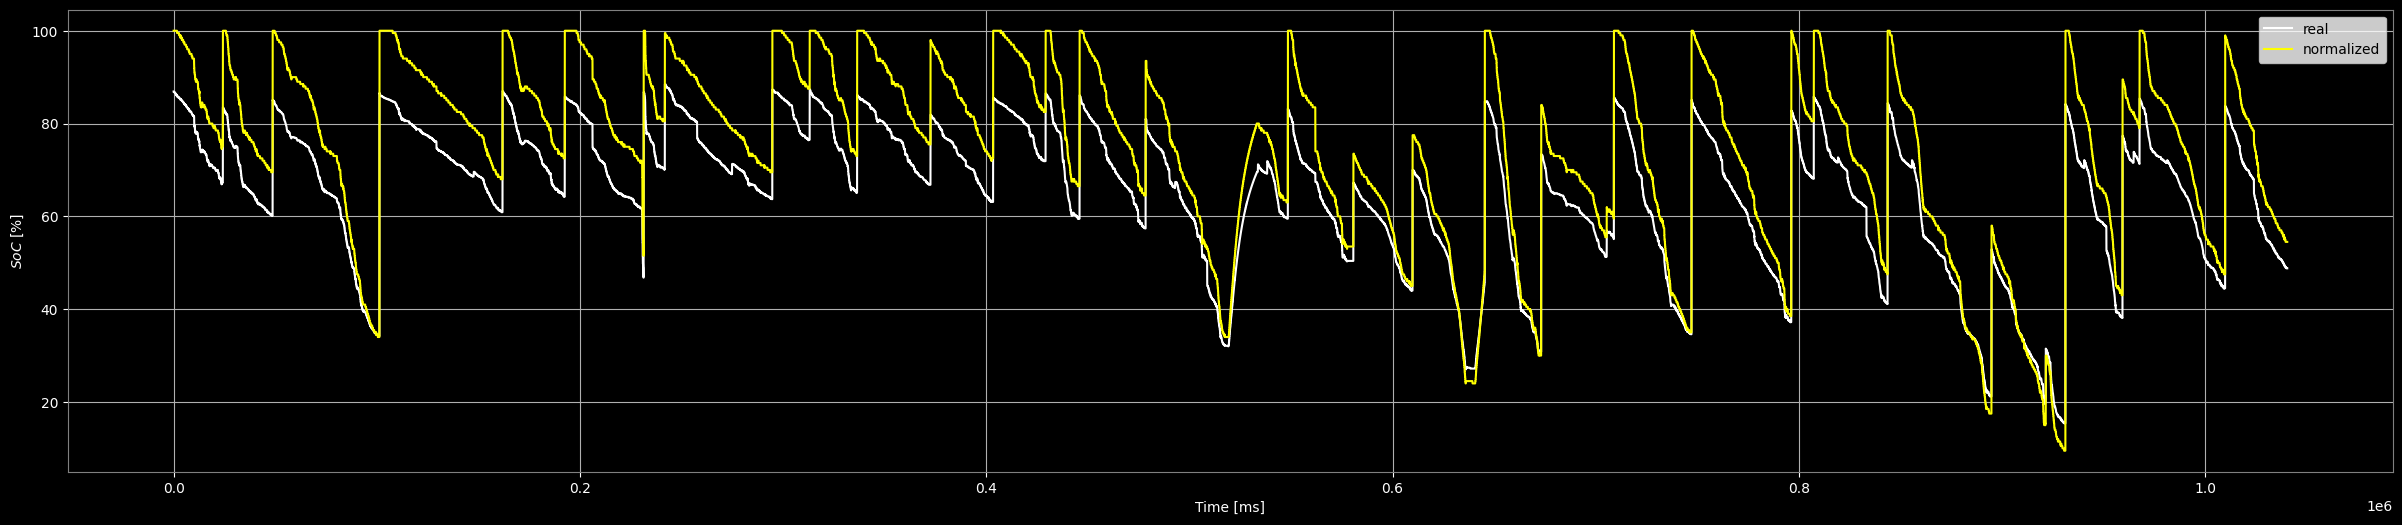

In [46]:
df_soc = df_master[['SoC [%]', 'displayed SoC [%]']].dropna()

# Let us look at battery SoC degradation over vehicle exploitation
plt.figure(figsize=(30, 6), facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(colors='white', which='both')
plt.grid(True)

plt.plot(df_soc['SoC [%]'], color="white")
plt.plot(df_soc['displayed SoC [%]'], color="yellow")
plt.xlabel('Time [ms]', color='white')
plt.ylabel('$SoC$ [%]', color='white')
plt.legend(['real','normalized'])

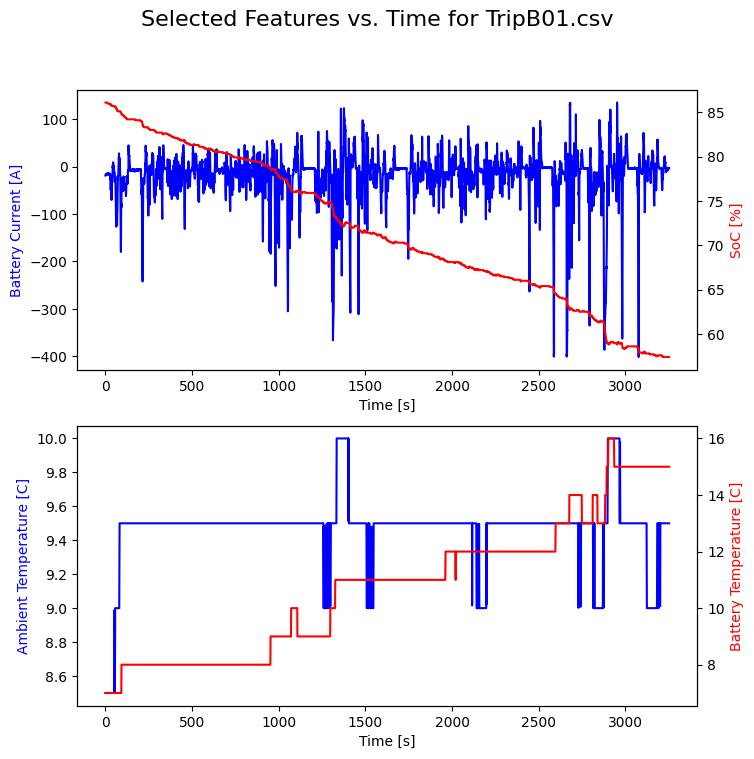

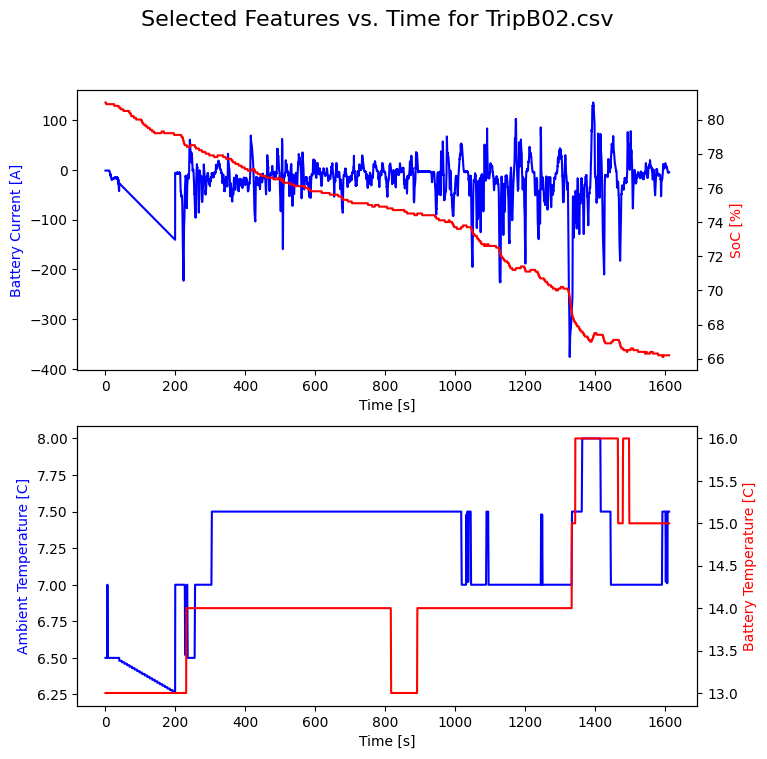

In [47]:
for trip in ['TripB01', 'TripB02']:
    df_trip = pd.read_csv(
    'dataset/{}.csv'.format(trip),
    sep=';',
    encoding=chardet.detect(open(f'dataset/{trip}.csv'.format(trip), 'rb').read())['encoding']
)

    # create figure and axes objects
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

    # plot battery current and SoC on shared axis
    axs[0].plot(df_trip['Time [s]'], df_trip['Battery Current [A]'], color='blue')
    axs0_2 = axs[0].twinx()
    axs0_2.plot(df_trip['Time [s]'], df_trip['SoC [%]'], color='red')
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Battery Current [A]', color='blue')
    axs0_2.set_ylabel('SoC [%]', color='red')

    # plot ambient and battery temperature on shared axis
    axs[1].plot(df_trip['Time [s]'], df_trip['Ambient Temperature [C]'], color='blue')
    axs1_2 = axs[1].twinx()
    axs1_2.plot(df_trip['Time [s]'], df_trip['Battery Temperature [C]'], color='red')
    axs[1].set_xlabel('Time [s]')
    axs[1].set_ylabel('Ambient Temperature [C]', color='blue')
    axs1_2.set_ylabel('Battery Temperature [C]', color='red')

    fig.suptitle('Selected Features vs. Time for ' + trip + '.csv', fontsize=16)
    #plt.savefig(path_to_figs_dir + trip + '.pdf' , format='pdf', bbox_inches='tight')


Computing feature correlation matrix...


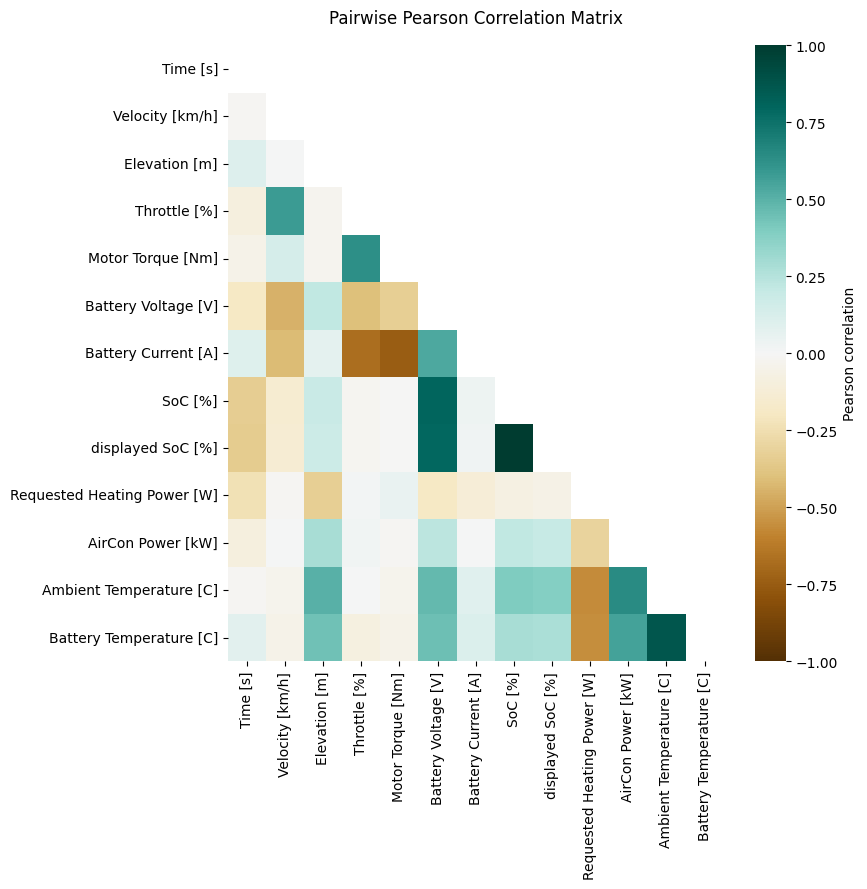

In [48]:
print('Computing feature correlation matrix...')
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(df_master.corr(method='pearson', numeric_only=True), dtype=bool))
sns_plot1 = sns.heatmap(df_master.corr(method='pearson', numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG', cbar_kws={'label': 'Pearson correlation'})
sns_plot1.set_title('Pairwise Pearson Correlation Matrix', fontdict={'fontsize':12}, pad=16);
# plt.show() # blocks execution
#sns_plot1.figure.savefig(path_to_figs_dir + 'feature-correlation-matrix.pdf', format='pdf', bbox_inches='tight')

<AxesSubplot: >

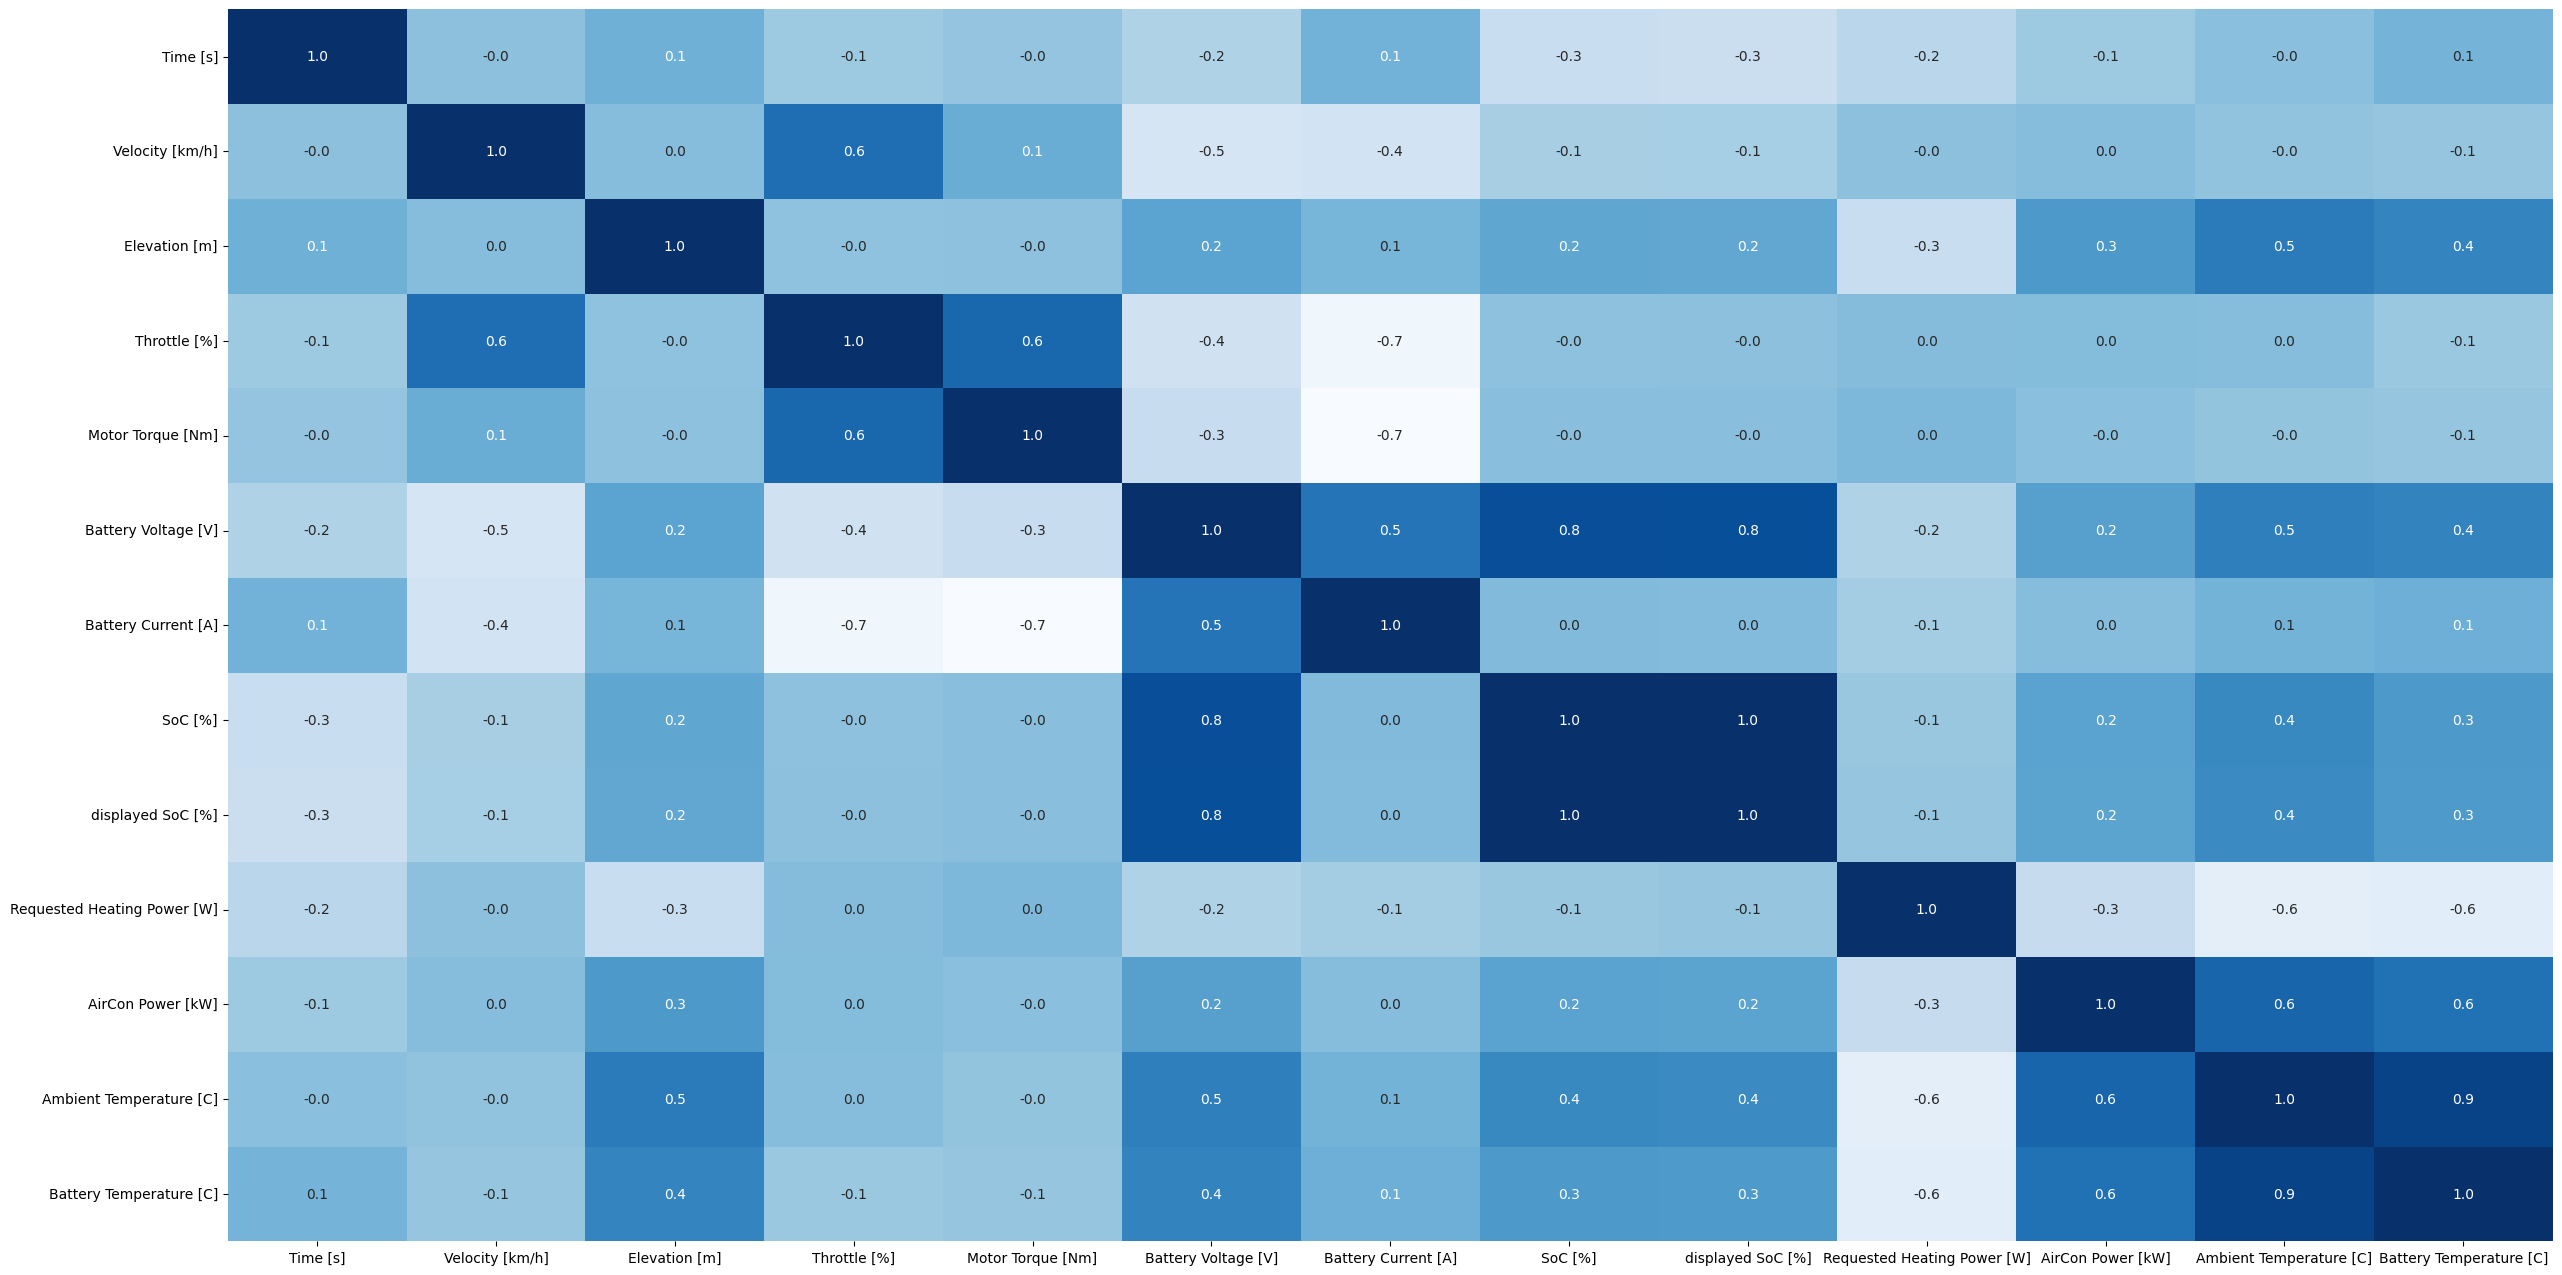

In [49]:
plt.figure(figsize=(30, 16))
sns.heatmap(df_master.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')


Computing correlation of features with battery temperature...


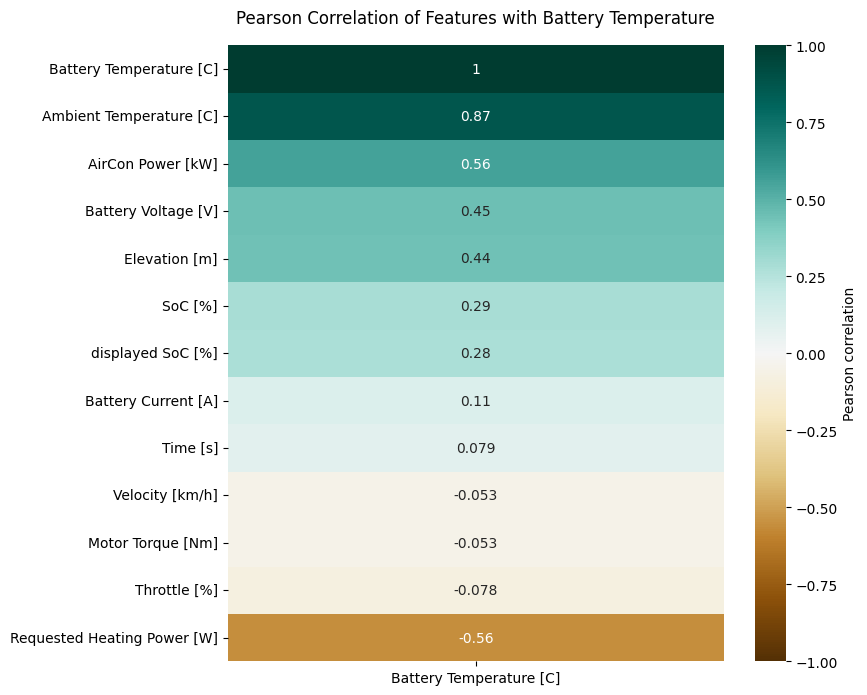

In [50]:
print('Computing correlation of features with battery temperature...')
df_master.corr(method='pearson', numeric_only=True)[['Battery Temperature [C]']].sort_values(by='Battery Temperature [C]', ascending=False)
plt.figure(figsize=(8, 8))
sns_plot2 = sns.heatmap(df_master.corr(method='pearson', numeric_only=True)[['Battery Temperature [C]']].sort_values(by='Battery Temperature [C]', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', cbar_kws={'label': 'Pearson correlation'})
sns_plot2.set_title('Pearson Correlation of Features with Battery Temperature', fontdict={'fontsize':12}, pad=16);
# plt.show() # blocks execution
#sns_plot2.figure.savefig(path_to_figs_dir + 'feature-correlation-with-temp.pdf', format='pdf', bbox_inches='tight')


In [53]:
def set_negative_plot_color():
    plt.figure(figsize=(30, 6), facecolor='black')
    ax = plt.axes()
    ax.set_facecolor("black")
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(colors='white', which='both')
    plt.grid(True)

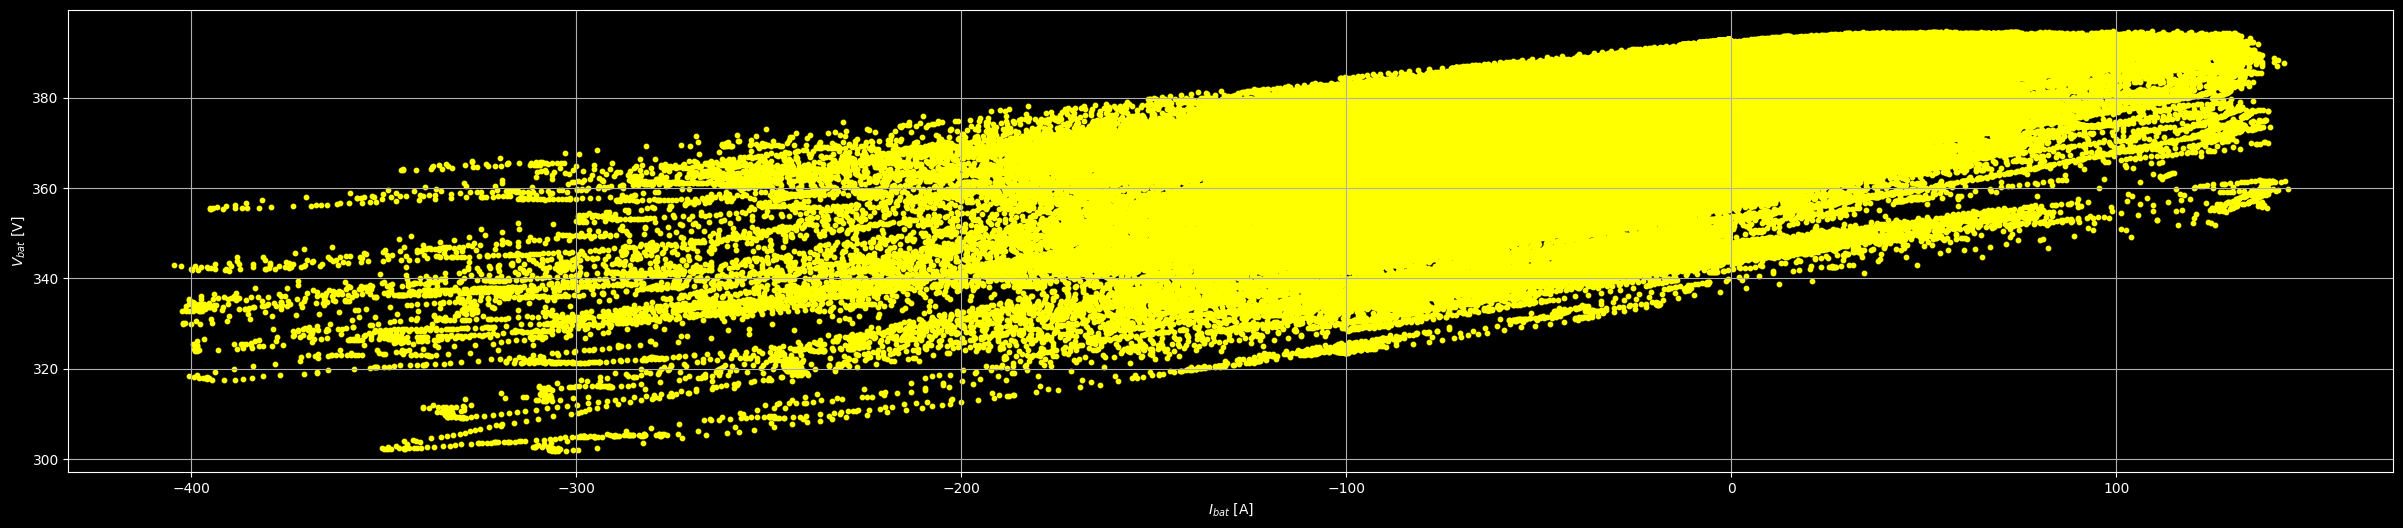

In [54]:
set_negative_plot_color()
plt.scatter(df_master['Battery Current [A]'], df_master['Battery Voltage [V]'], color="yellow", s=10)
plt.xlabel('$I_{bat}$ [A]', color='white')
plt.ylabel('$V_{bat}$ [V]', color='white');

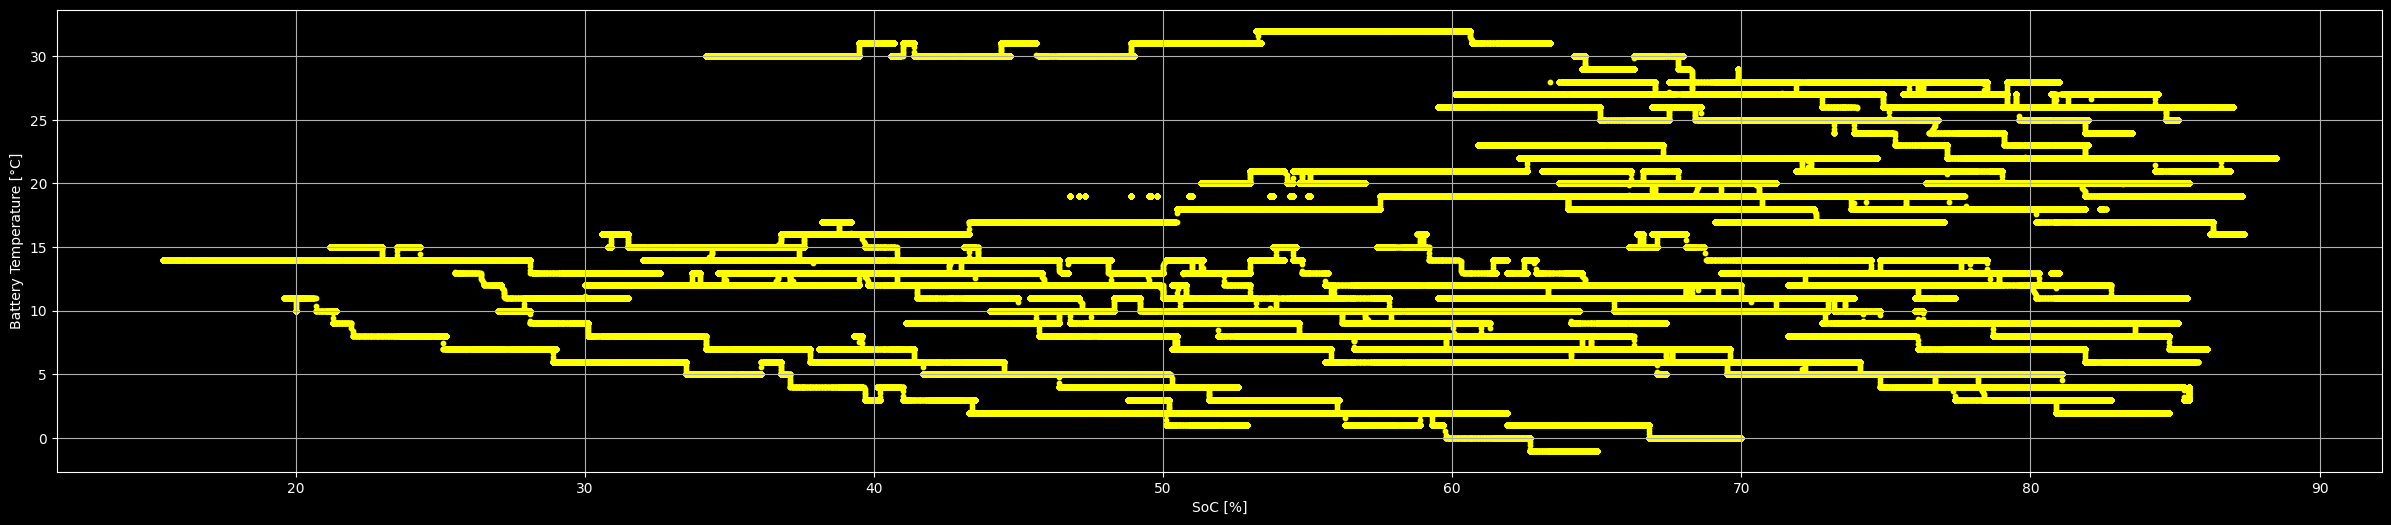

In [56]:
set_negative_plot_color()
plt.scatter(df_master['SoC [%]'], df_master['Battery Temperature [C]'], color="yellow", s=10)
plt.xlabel('SoC [%]', color='white')
plt.ylabel('Battery Temperature [°C]', color='white');

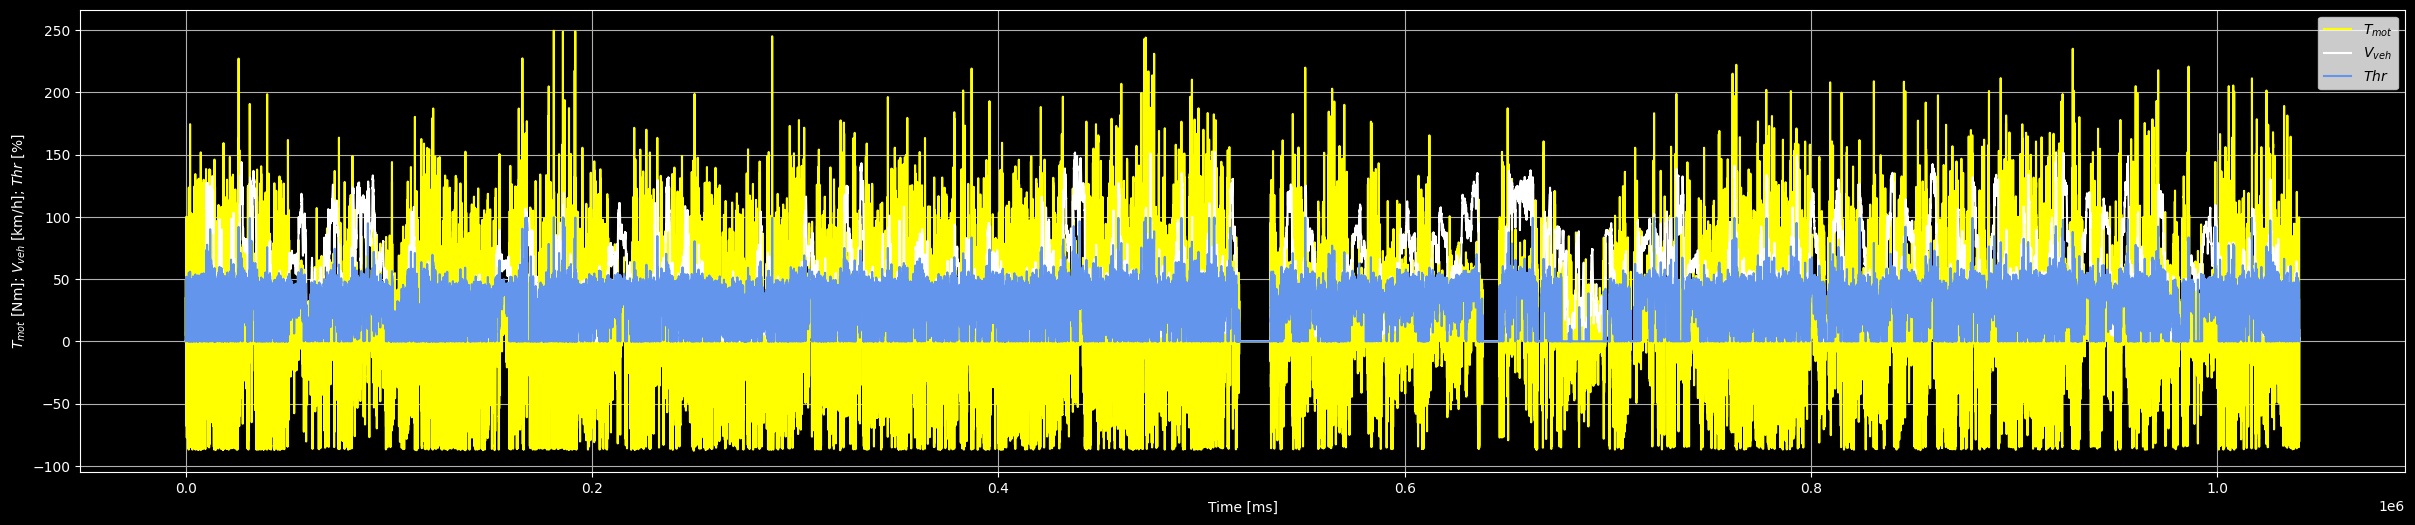

In [57]:
set_negative_plot_color()
plt.plot(df_master['Motor Torque [Nm]'], color="yellow")
plt.plot(df_master['Velocity [km/h]'], color="white")
plt.plot(df_master['Throttle [%]'], color="cornflowerblue")
plt.xlabel('Time [ms]', color='white')
plt.ylabel('$T_{mot}$ [Nm]; $V_{veh}$ [km/h]; $Thr$ [%]', color='white')
plt.legend(['$T_{mot}$','$V_{veh}$','$Thr$']);